# Wprowadzenie

<p> Pierwsze laboratoria z kursu dotyczyły przetwarzania i analizy sygnałów EKG.</p>

### Sygnał EKG

<p>Charakterystyka sygnału EKG prezentuje sie w następujący sposób:

- **Amplituda**: Sygnał EKG charakteryzuje się małą amplitudą w porównaniu do innych sygnałów biologicznych, takich jak sygnał elektromiograficzny (EMG) czy elektroencefalograficzny (EEG). Typowe wartości amplitudy oscylują w zakresie od kilku mikrowoltów do kilkudziesięciu mikrowoltów.

- **Częstotliwość**: Zakres częstotliwości sygnału EKG to zazwyczaj od 0,05 do 100 Hz. Składa się z kilku składowych, w tym fal P, kompleksu QRS oraz fali T. Fala P zwykle ma najniższą częstotliwość, podczas gdy kompleks QRS i fala T są wyższej częstotliwości.

- **Zakłócenia**: Sygnał EKG jest podatny na różne rodzaje zakłóceń, takie jak szumy sieciowe, ruchy mięśni czy artefakty wynikające z ruchów pacjenta. W celu poprawy jakości sygnału stosuje się różne techniki filtracji, w tym filtry dolno- i górnozaporowe oraz filtrację adaptacyjną.

- **Trwałość sygnału**: Sygnał EKG jest stosunkowo trwały w czasie, jednak może ulegać zmianom w przypadku wystąpienia arytmii lub innych patologii serca. Analiza długoterminowych zmian w sygnale EKG może być pomocna w diagnostyce chorób serca.

- **Interpretacja kliniczna**: Pomimo że sygnał EKG jest generowany przez aktywność elektryczną serca, jego interpretacja kliniczna wymaga znajomości anatomii i fizjologii serca. Inżynierowie często współpracują z lekarzami w celu opracowania algorytmów automatycznej analizy sygnału EKG, która może pomóc w szybkiej diagnozie chorób serca.

- **Techniki przetwarzania sygnału**: W celu ekstrakcji istotnych informacji z sygnału EKG stosuje się różnorodne techniki przetwarzania sygnału, takie jak analiza czasowo-częstotliwościowa, transformata Fouriera, algorytmy detekcji pików i klasyfikacja. Te techniki pomagają w automatycznej analizie i interpretacji sygnału EKG.</p>



</p>

### Python oraz jego biblioteki do przetwarzania i wizualizacji danych

<p>Aby rozpocząć pracę nad analizą sygnałów EKG, najpierw należało załadować odpowiednie biblioteki</p>

In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import fft
import scipy.signal as sig

<p>Wykorzystane biblioteki:

- **argparse**: Biblioteka ta umożliwia obsługę argumentów wiersza poleceń w sposób elastyczny i intuicyjny. Jest używana do parsowania argumentów podanych podczas uruchamiania skryptu. Dzięki temu można łatwo wprowadzać parametry konfiguracyjne lub opcje do programu bez potrzeby ręcznego wprowadzania ich w kodzie. Jest to szczególnie przydatne w przypadku programów, które wymagają różnych ustawień, takich jak analiza danych.

- **pathlib**: Ta biblioteka dostarcza klasę Path, która jest wygodnym sposobem na manipulację ścieżkami plików i katalogów. Jest to bardziej nowoczesna alternatywa dla modułu os.path, oferująca bardziej czytelny i przenośny sposób zarządzania ścieżkami. Może być używana do dynamicznego tworzenia, modyfikowania i analizowania ścieżek do plików, co jest kluczowe w inżynierii oprogramowania, szczególnie przy pracy z dużymi zbiorami danych lub systemami plików.

- **numpy**: To podstawowa biblioteka do obliczeń numerycznych w języku Python. Zapewnia efektywne operacje na macierzach i tablicach wielowymiarowych, co jest niezbędne w wielu dziedzinach inżynierii, w tym przetwarzaniu sygnałów, analizie danych, uczeniu maszynowym i symulacjach. Może być wykorzystywana do wykonywania zaawansowanych obliczeń matematycznych i statystycznych, takich jak transformaty Fouriera, co jest istotne przy analizie sygnałów EKG.

- **scipy**: Biblioteka ta jest często używana w celu rozszerzenia funkcjonalności NumPy poprzez dostarczanie dodatkowych algorytmów i narzędzi do naukowego obliczeń. Zawiera wiele modułów, w tym do przetwarzania sygnałów, interpolacji, optymalizacji i statystyki. Funkcje dostępne w module fft (Fast Fourier Transform) są używane do wykonania szybkich transformat Fouriera na sygnałach EKG, co umożliwia analizę ich częstotliwości.

- **seaborn**: Jest to biblioteka do wizualizacji danych, zbudowana na platformie matplotlib. Oferuje wysoki poziom abstrakcji i prostotę użycia, co ułatwia tworzenie atrakcyjnych wykresów statystycznych. W kontekście inżynierii, seaborn może być używany do prezentacji wyników analizy sygnałów EKG w sposób czytelny i zrozumiały dla użytkownika.

- **matplotlib.pyplot**: Jest to popularna biblioteka do tworzenia wykresów i wizualizacji danych w Pythonie. Zapewnia szeroki zakres funkcji do tworzenia różnych typów wykresów, od prostych wykresów liniowych po histogramy, wykresy kołowe i heatmapy. W kontekście inżynierii, matplotlib.pyplot jest często używany do prezentacji wyników analizy danych, w tym sygnałów EKG, co umożliwia lepsze zrozumienie i interpretację danych przez użytkowników końcowych.
</p>

# Platforma testowa

<p>W ramach pierwszego ćwiczenia należało napisać skrypt umożliwiający wczytywanie i wizualizację badanych sygnałów. Jako przykład sygnału EKG wykorzystano plik <b>ekg1.txt</b> znajdujący się w folderze <i>data</i>. Fragment pliku wygląda następująco</p>

```
111 326 214 -197 -53 254 497 829 230 388 154 -85
106 326 219 -217 -50 271 497 833 235 388 155 -88
91 321 228 -214 -55 274 486 833 244 402 165 -83
96 321 224 -205 -67 276 486 837 244 407 175 -69
77 302 224 -207 -62 274 496 832 235 407 175 -69
81 298 214 -187 -72 264 486 822 215 392 165 -73
```

<p>Każda kolumna pliku oznacza jedno pojedyncze odprowadzenie EKG. Odprowadzeń jest w sumie 12. Wiersze oznaczają wartości sygnałów dla kolejnych próbek. Próbki w wierszach są rozdzielone spacjami. Wartości w pliku zostały potraktowane jako tablica i wczytane za pomocą biblioteki numpy.</p>

In [2]:
filename = "ekg1.txt"
path = Path.cwd().parent.joinpath("data", filename)
signals = np.loadtxt(path)
print("Poprawnie wczytano tablice. Jej kształt to " + str(signals.shape))

Poprawnie wczytano tablice. Jej kształt to (5000, 12)


<p>Wczytany sygnał posiada 5000 wierszy i 12 kolumn, czyli 5000 próbek i 12 kanałów. W instrukcji laboratoryjnej tego ćwiczenia podano częstotliwość próbkowania tego sygnału, która wynosi fs = 1000 Hz. Informacja ta zostanie wykorzystana do przygotowania danych do sporządzenia wykresu sygnału.</p>

In [3]:
fs = 1000
lenght = signals.shape[0]
samples = np.linspace(0, lenght//fs, lenght)
signals = signals.transpose()

<p>Częstotliwość próbkowania sygnału umieszczono w zmiennej o nazwie <i>fs</i>. Zmienna <i>lenght</i> przechowuje informacje o ilości próbek. Aby zatem otrzymać czas próbkowania, należy podzielić ilość próbek przez częstotliwość próbkowania. Dziedzinę czasu trwania sygnału zapisano do tablicy <i>samples</i>. Na końcu, w tablicy z sygnałami zamieniono kolumny i wiersze miejscami. Dzięki temu dane są gotowe do narysowania wykresu.</p>

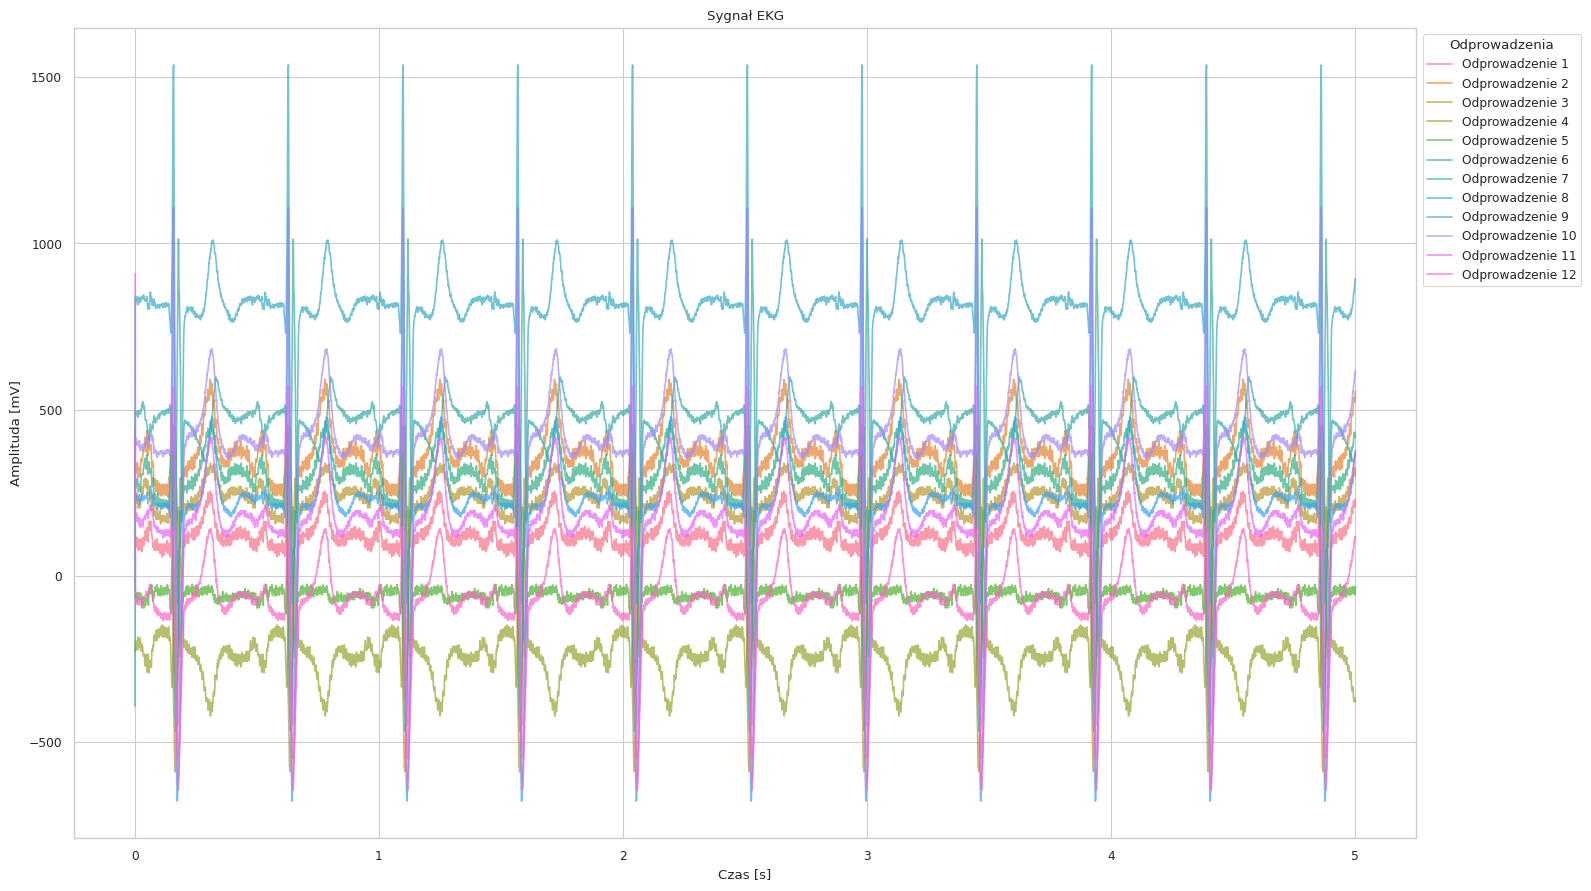

In [4]:
plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid", context="paper", palette=sns.color_palette("husl", 12))

for signal in signals:
    sns.lineplot(x=samples, y=signal, errorbar=None, alpha=0.7).set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał EKG")

labels = []
for column in range(signals.shape[1]):
        labels.append("Odprowadzenie " + str(column + 1))

plt.legend(labels=labels, title="Odprowadzenia", loc=2, bbox_to_anchor= (1,1))
plt.tight_layout()

W celu zwiększenia czytelności wykresu ograniczono dziedzinę sygnału to 1 okresu, czego efekt został przedstawiony na wykresie poniżej.
![zad1w1](../assets/Lab1/lab1zad1w1.png)

<p>Opis wykresu:

- **Sygnał EKG**
   - Ten wykres przedstawia sygnały EKG z różnych odprowadzeń w funkcji czasu.
   - Oś x reprezentuje czas w sekundach (s).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Każda linia na wykresie odpowiada sygnałowi EKG z jednego z odprowadzeń.
   - Sygnały te są zarejestrowane w różnych punktach na ciele pacjenta i reprezentują zmiany w potencjale elektrycznym serca w czasie.</p>

# Analiza sygnałów okresowych w dziedzinie częstotliwości

<p>Sygnały okresowe sinusoidalne mogą składać się wielu sinusoid nałożonych na siebie. Aby dowiedzieć się, jakie sinusoidy wchodzą w skład badanego sygnału, można posłużyć się transformacją Fouriera. Najpierw wygenerowany zostanie ciąg próbek fali sinusoidalnej o częstotliwości 50 Hz i długości 65536.</p>

In [5]:
frequencies = [50]
time = 1
lenght = 65536
normalize = lenght / 2
samples = np.linspace(0, time, lenght)
freq_domain = np.fft.rfftfreq(lenght, 1 / (lenght//time))
signal = np.sin(2 * np.pi * samples * frequencies[0])

<p>Na samej górze zdefiniowano listę <i>frequencies</i>. Jako czas badania sygnału na początku podano 1 sekundę. Zdefiniowano również zadaną ilość próbek oraz normalizację, która będzie potrzebna do wizualizacji widma amplitudowego sygnału. Poza dziedziną czasu wyznaczono również dziedzinę częstotliwości, która też będzie potrzebna do wykresu widma. Na koniec, za pomocą funkcji np.sin() stworzono próbki fali sinusoidalnej.</p>

[Text(0.5, 0, 'Czas [s]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Sygnał sinusoidalny')]

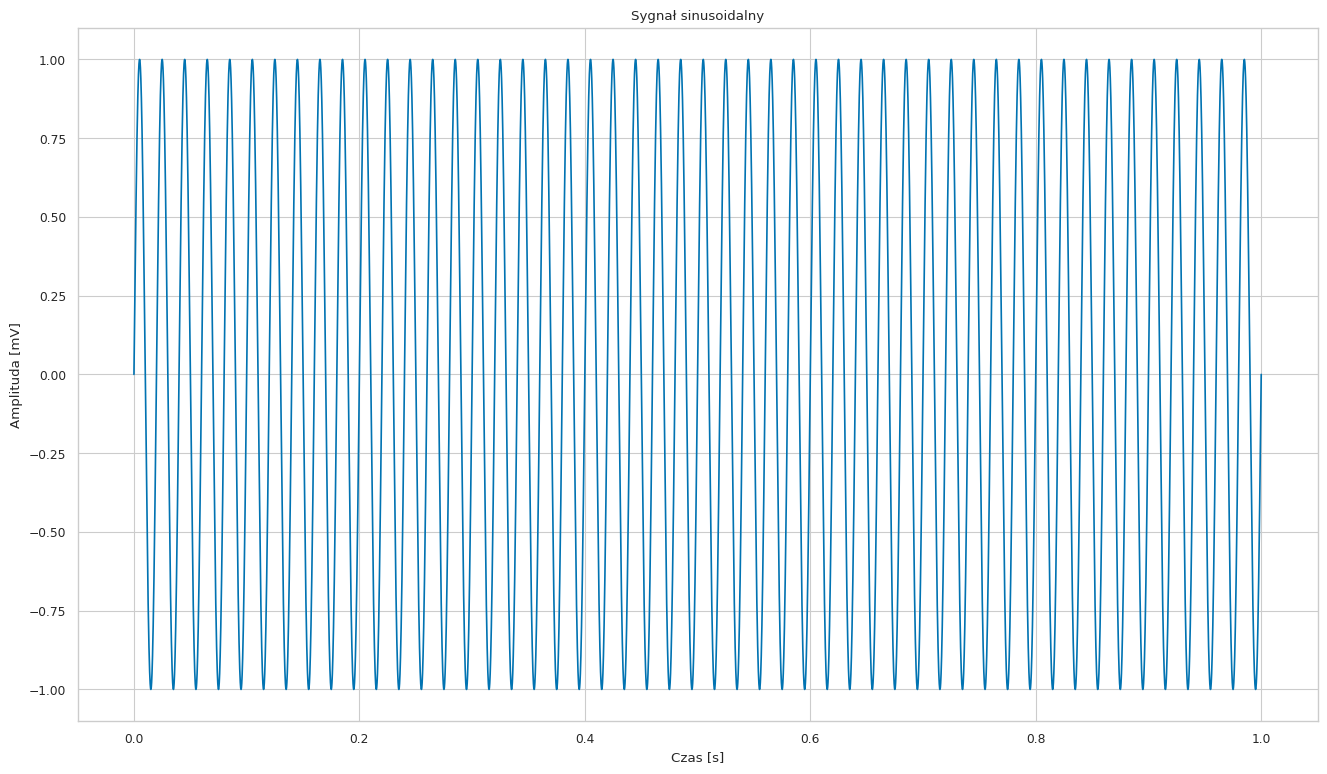

In [6]:
sns.set_theme(palette="colorblind", style="whitegrid", context="paper")
fig = plt.figure(figsize=(16,9))
sns.lineplot(x=samples, y=signal, legend=None, color='C0').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał sinusoidalny")

<p>Do przeprowadzenia transformacji Fouriera zostanie wykorzystana funkcja np.rfft .</p>

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Widmo amplitudowe sygnału po transformacji Fouriera')]

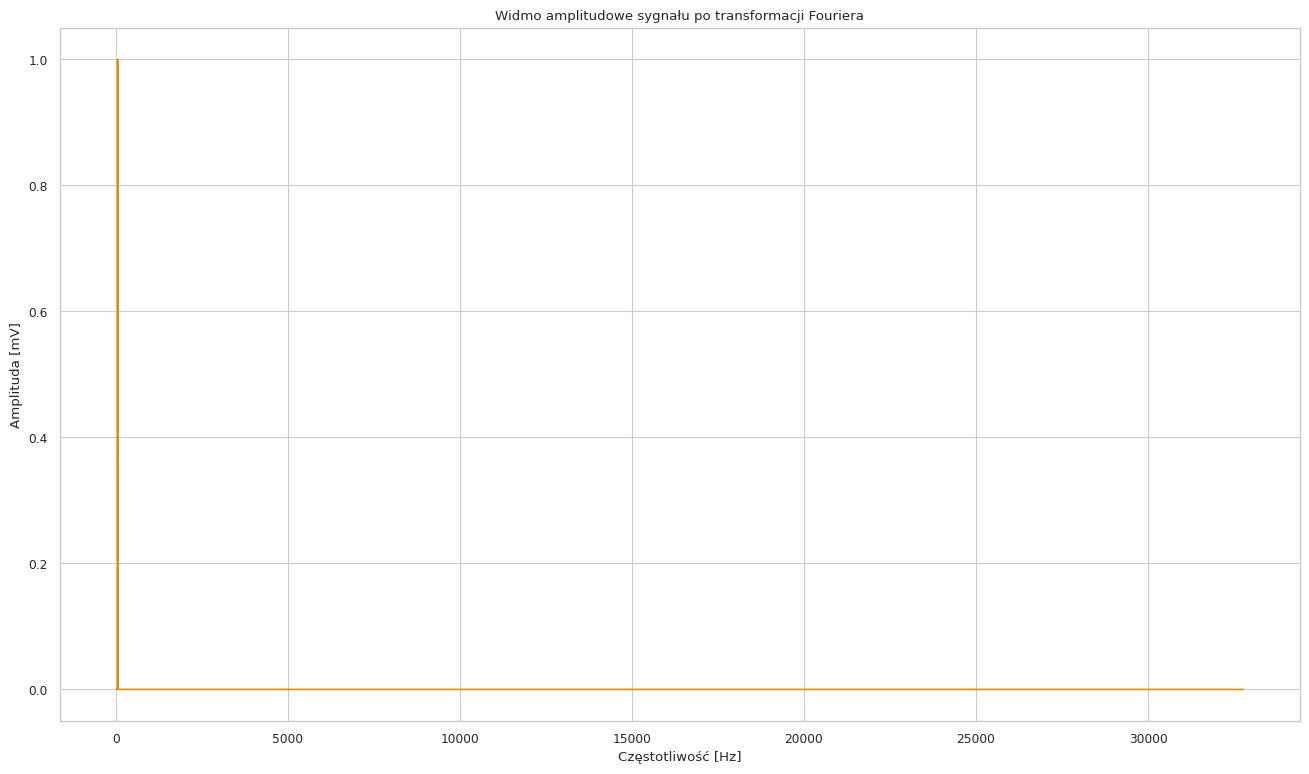

In [7]:
fsignal = np.fft.rfft(signal)
fig = plt.figure(figsize=(16,9))
sns.lineplot(x=freq_domain, y=np.abs(fsignal)/normalize, legend=None, color='C1').set(xlabel="Częstotliwość [Hz]", ylabel="Amplituda [mV]", title="Widmo amplitudowe sygnału po transformacji Fouriera")

<p>Na wykresie widać tylko jeden prążek. Częstotliwość próbkowania tego sygnału była bardzo wysoka w stosunku do częstotliwości sygnału. Z tego powodu na skali na tym wykresie prążek znajduje się blisko zera. Do badanego sygnału zostanie dodana sinusoida o częstotliwości 60 Hz.</p>

[Text(0.5, 0, 'Czas [s]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Sygnał sinusoidalny')]

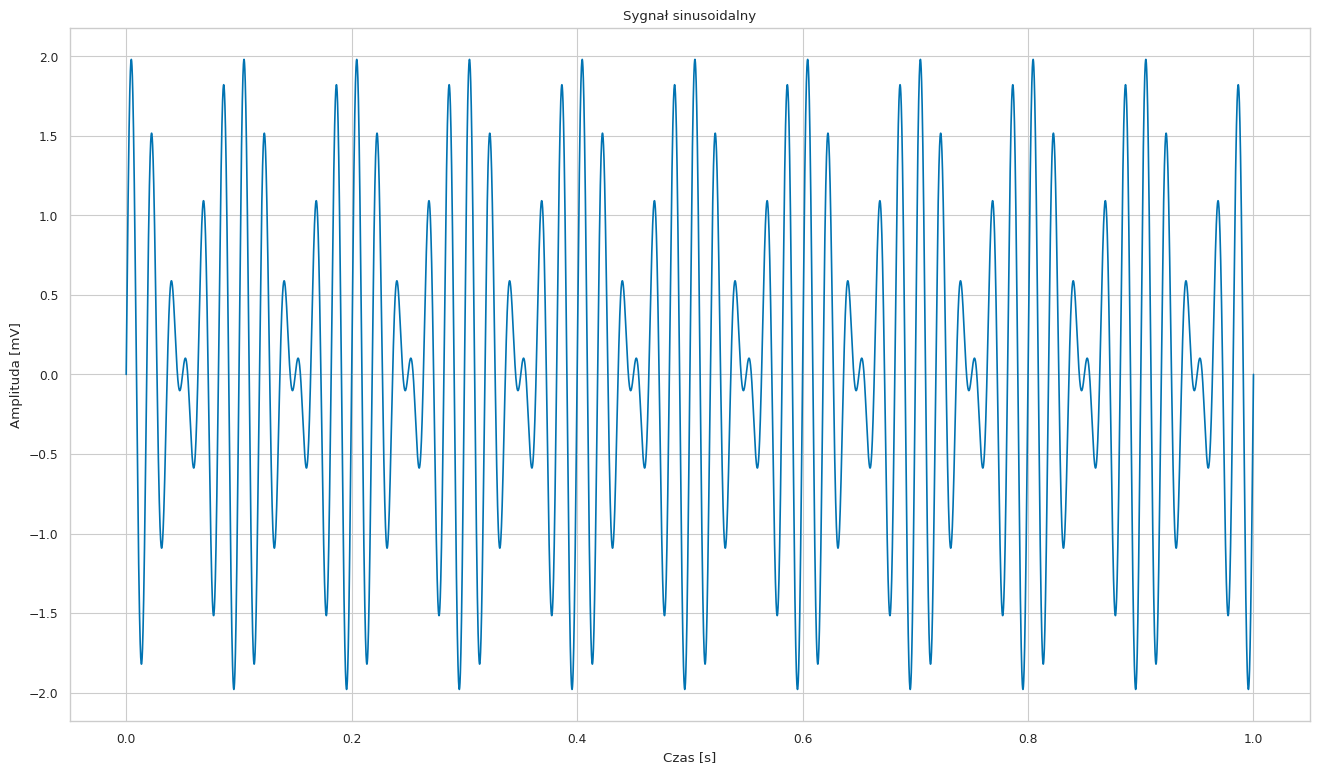

In [8]:
signal += np.sin(2 * np.pi * samples * 60)
fig = plt.figure(figsize=(16,9))
sns.lineplot(x=samples, y=signal, legend=None, color='C0').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał sinusoidalny")

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Widmo amplitudowe sygnału po transformacji Fouriera')]

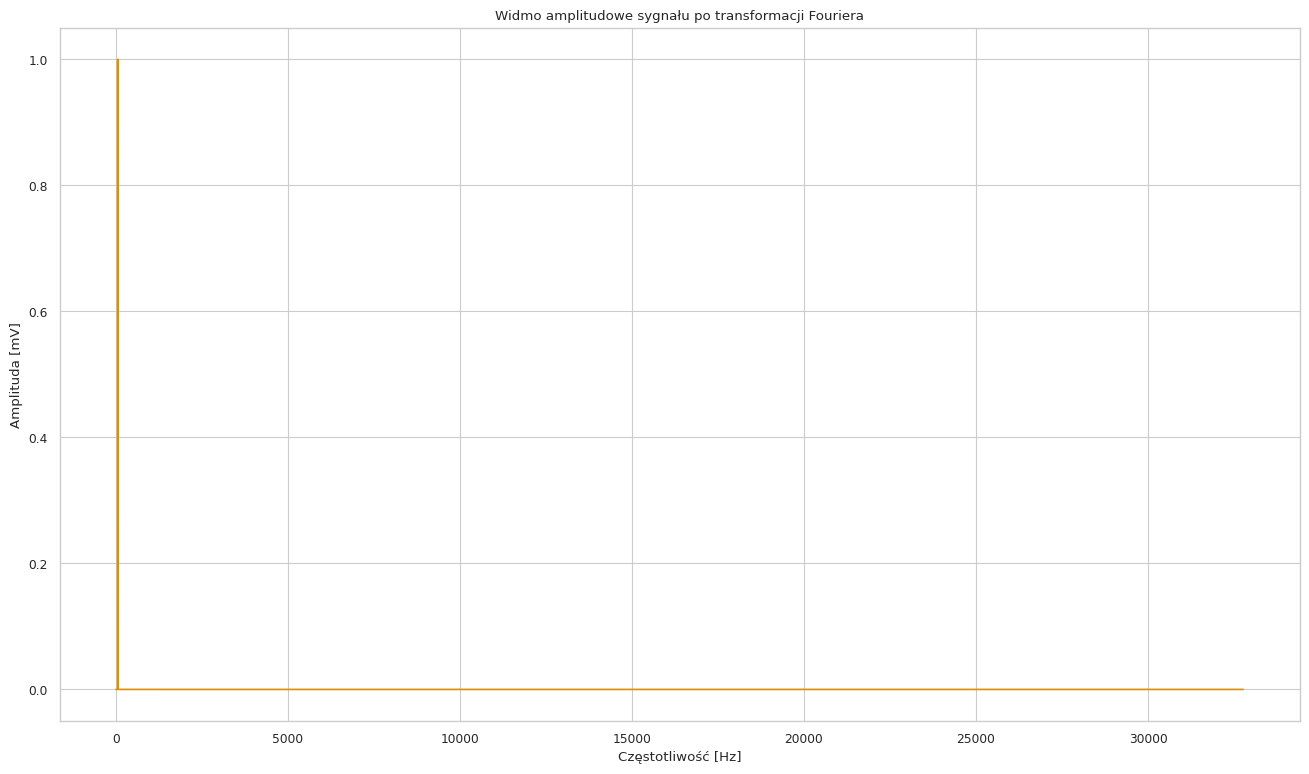

In [9]:
fsignal = np.fft.rfft(signal)
fig = plt.figure(figsize=(16,9))
sns.lineplot(x=freq_domain, y=np.abs(fsignal)/normalize, legend=None, color='C1').set(xlabel="Częstotliwość [Hz]", ylabel="Amplituda [mV]", title="Widmo amplitudowe sygnału po transformacji Fouriera")

<p>Im mniejsza jest częstotliwość próbkowania, tym mniejsza będzie skala na wykresie widma amplitudowego. Uniemożliwi to obserwacje dużych częstotliwości sygnałów, lecz wykres będzie wtedy bardziej czytelny. Za pomocą skryptu <b>part_2.py</b> zbadano widmo amplitudowe sygnału dla czasów 5, 15 oraz 40 sekund.</p>

![zad2w1](../assets/Lab1/lab1zad2w1.png)

Wykres całościowy dla czasu t=5s

![image.png](../assets/Lab1/lab1zad2w4.png)

Wykres przybliżony dla czasu t=5s

![zad2w2](../assets/Lab1/lab1zad2w2.png)

Wykres całościowy dla czasu t=15s

![image-2.png](../assets/Lab1/lab1zad2w5.png)

Wykres przybliżony dla czasu t=15s

![zad2w3](../assets/Lab1/lab1zad2w3.png)

Wykres całościowy dla czasu t=40s

![image-3.png](../assets/Lab1/lab1zad2w6.png)

Wykres przybliżony dla czasu t=40s

<p>Ilość próbek dla każdego sygnału pozostała taka sama. Z tego powodu, przy zwiększeniu czasu trwania sygnału, zmiejszyła się go częstotliwość próbkowania. To spowodowało, że skala częstotliwości na wykresie widma amplitudowego się zmniejszyła. Zielone wykresy oznaczają sygnały po odwrotnej transformacji Fouriera. Ponieważ na widmie nie zostały przeprowadzone żadne operacje, różnice między sygnałem oryginalnym a sygnałem po transformacji są niewielkie.</p>

In [10]:
inv_signal = np.fft.irfft(fsignal)
print(signal - inv_signal)

[ 1.30104261e-18  1.73472348e-18  0.00000000e+00 ... -7.28583860e-17
 -2.61943245e-16 -1.09093174e-16]


# Analiza sygnału EKG w dziedzinie częstotliwości

<p>Transformacje Fouriera można wykorzystać do analizy sygnału EKG. W tym celu postąpiono w ten sam sposób, co z sygnałem sinusoidalnym. Z folderu <i>data</i> wczytano plik <b>ekg100.txt</b>. Fragment pliku wygląda następująco</p>

```
  -1.4500000e-01
  -1.4500000e-01
  -1.4500000e-01
  -1.4500000e-01
  -1.4500000e-01
  -1.4500000e-01
  -1.4500000e-01
  -1.2000000e-01
  -1.3500000e-01
  -1.4500000e-01
  -1.5000000e-01
  -1.6000000e-01
  -1.5500000e-01
  -1.6000000e-01
  -1.7500000e-01
  -1.8000000e-01
  -1.8500000e-01
  -1.7000000e-01
  -1.5500000e-01
  -1.7500000e-01
  -1.8000000e-01
```
<p>Plik składa się tylko z jednej kolumny, która zawiera wartości sygnału EKG. Można zatem potraktować zapisane w niej wartości jako tablicę jednowymiarową.</p>

In [11]:
filename = "ekg100.txt"
path = Path.cwd().parent.joinpath("data", filename)
signal = np.loadtxt(path, dtype=float)
print("Poprawnie wczytano tablice. Jej kształt to " + str(signal.shape))

fs = 360
lenght = signal.shape[0]
normalize = lenght / 2
samples = np.linspace(0, lenght//fs, lenght)
freq_domain = fft.rfftfreq(lenght, 1/fs)

Poprawnie wczytano tablice. Jej kształt to (304720,)


<p>Zapis sygnału składa się z 304720 próbek i próbkowany był z częstotliwością 360 Hz. Tak jak w poprzednim zadaniu, tutaj zapisano długość sygnału, dziedzinę czasu oraz dziedzinę częstotliwości. Dalej można przeprowadzić transformację Fouriera i przedstawić widmo sygnału.</p>

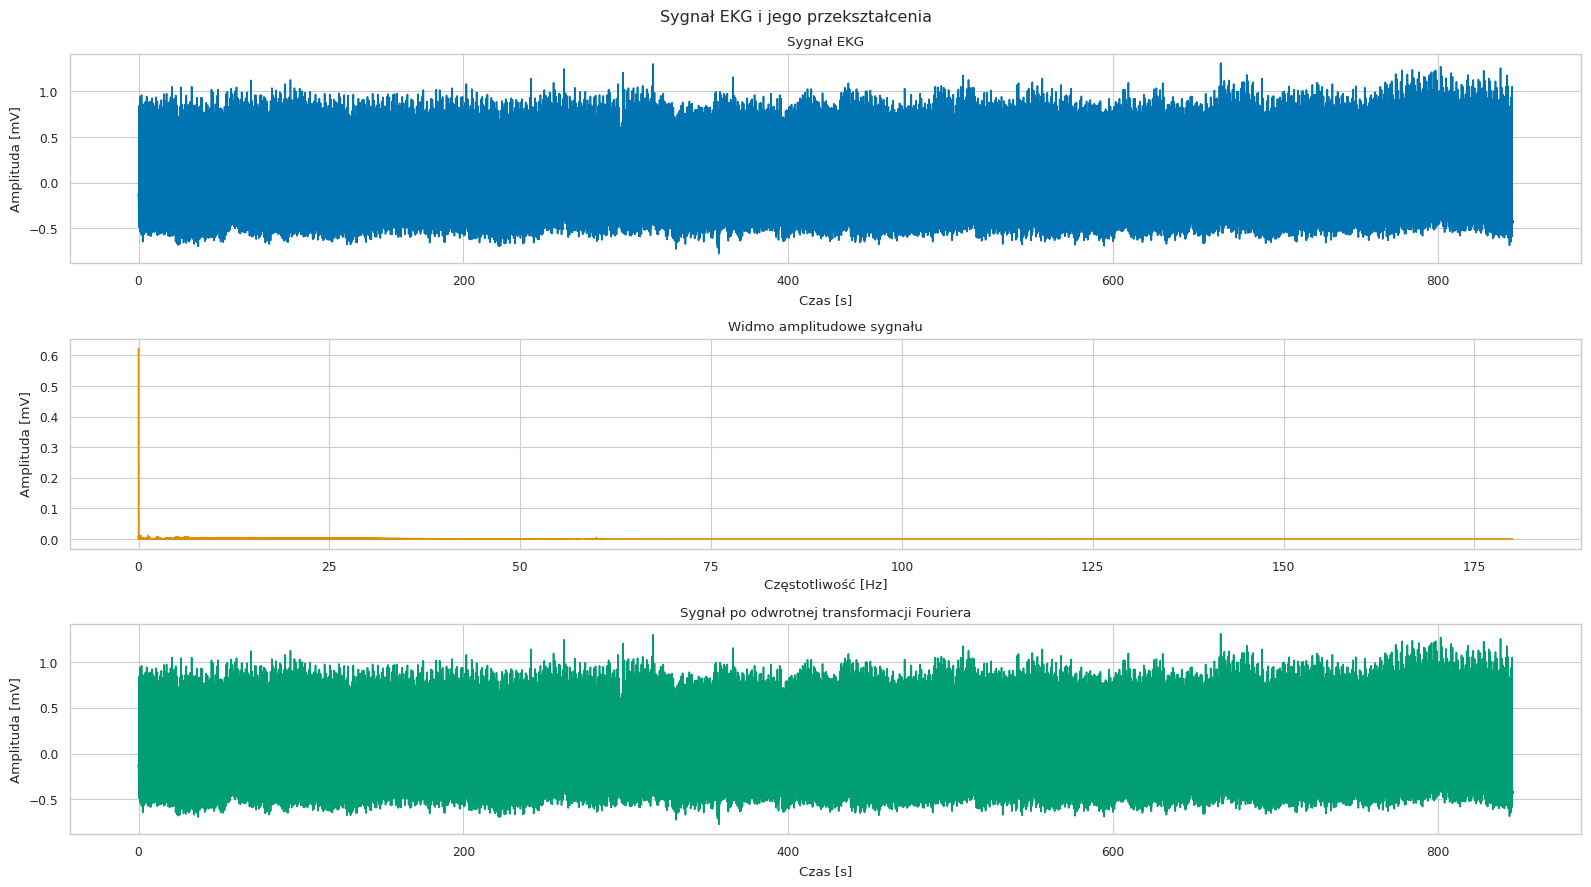

In [12]:
fsignal = fft.rfft(signal)
inv_signal = fft.irfft(fsignal)

sns.set_theme(palette="colorblind", style="whitegrid", context="paper")
fig = plt.figure(figsize=(16,9))
fig.suptitle("Sygnał EKG i jego przekształcenia")
gs = plt.GridSpec(nrows=3, ncols=1)
fig.add_subplot(gs[0,0])
sns.lineplot(x=samples, y=signal, legend=None, color='C0').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał EKG")
fig.add_subplot(gs[1,0])
sns.lineplot(x=freq_domain, y=np.abs(fsignal)/normalize, legend=None, color='C1').set(xlabel="Częstotliwość [Hz]", ylabel="Amplituda [mV]", title="Widmo amplitudowe sygnału")
fig.add_subplot(gs[2,0])
sns.lineplot(x=samples, y=inv_signal, legend=None, color='C2').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał po odwrotnej transformacji Fouriera")
plt.tight_layout()

Wykres całościowy sygnału EKG i jego odwrotnej transformaty Fouriera

![zad3w1](../assets/Lab1/lab1zad3w1.png)

Wykres przybliżony sygnału EKG i jego odwrotnej transformaty Fouriera

<p>Widmo tego sygnału wygląda inaczej, niż widma wcześniej badanych sygnałów sinusoidalnych. Na samym początku wykresu znajduje się wysoki prążek. Przeskalowywuje on oś z amplitudą i sprawia, że wykres staje się nieczytelny. Tak jak w przypadku poprzednich sygnałów, między sygnałem przed i po transformacji Fouriera nie ma znacznych różnic.</p>

# Filtracja sygnału EKG

<p>Transformację Fouriera można również wykorzystać do tego, aby usunąć nieporządane częstotliwości z badanego sygnału. Do filtracji sygnałów można wykorzystać filtry. W ramach tego ćwiczenia zaprezentowano filtracje sygnału na przykładzie filtru Butterwortha.</p>
<p>Na początku wczytano plik <b>ekg_noise.txt</b> z folderu <i>data</i>. Fragment pliku wygląda tak</p>

```
   1.3888889e-02  -3.9696152e-01
   1.6666667e-02  -3.4000000e-01
   1.9444444e-02  -2.6303848e-01
   2.2222222e-02  -2.5803848e-01
   2.5000000e-02  -3.1500000e-01
   2.7777778e-02  -3.9196152e-01
   3.0555556e-02  -4.0696152e-01
   3.3333333e-02  -3.5500000e-01
   3.6111111e-02  -2.8303848e-01
   3.8888889e-02  -2.7303848e-01
   4.1666667e-02  -3.0500000e-01
   4.4444444e-02  -3.5696152e-01
   4.7222222e-02  -3.8696152e-01
   5.0000000e-02  -3.5000000e-01
   5.2777778e-02  -3.1803848e-01
   5.5555556e-02  -3.1303848e-01
   5.8333333e-02  -3.5000000e-01
```
<p>Pierwsza kolumna oznacza czas podany w sekundach, natomiast druga oznacza amplidutę w mV. Sygnał był próbkowany z częstotliwością 360 Hz. Dane załadowano do tablicy <i>data</i>.</p>

In [ ]:
filename = "ekg_noise.txt"
path = Path.cwd().parent.joinpath("data", filename)
data = np.loadtxt(path)

time, signal = data.T
lenght = len(signal)
normalize = lenght / 2
fs = lenght // time[-1]
freq_domain = fft.rfftfreq(lenght, 1 / fs)

lowcut = 5
highcut = 60
order = 7
fsignal = fft.rfft(signal)

<p>Na początku wczytano dane z pliku. Następnie rozdzielono czas i amplitudę do osobnych tablic. Zapisano długość, częstotliwość próbkowania i dziedzinę częstotliwości dla badanego sygnału. Następnie zdefiniowano częstotliwości kluczowe dla filtra. Dolne ograniczenie wynosi 5 Hz, natomiast górne ograniczenie wynosi 60 Hz. Używany filtr jest filtrem 7 rzędu. Badany sygnał razem z jego widmem wyglądają następująco</p>

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Widmo amplitudowe sygnału')]

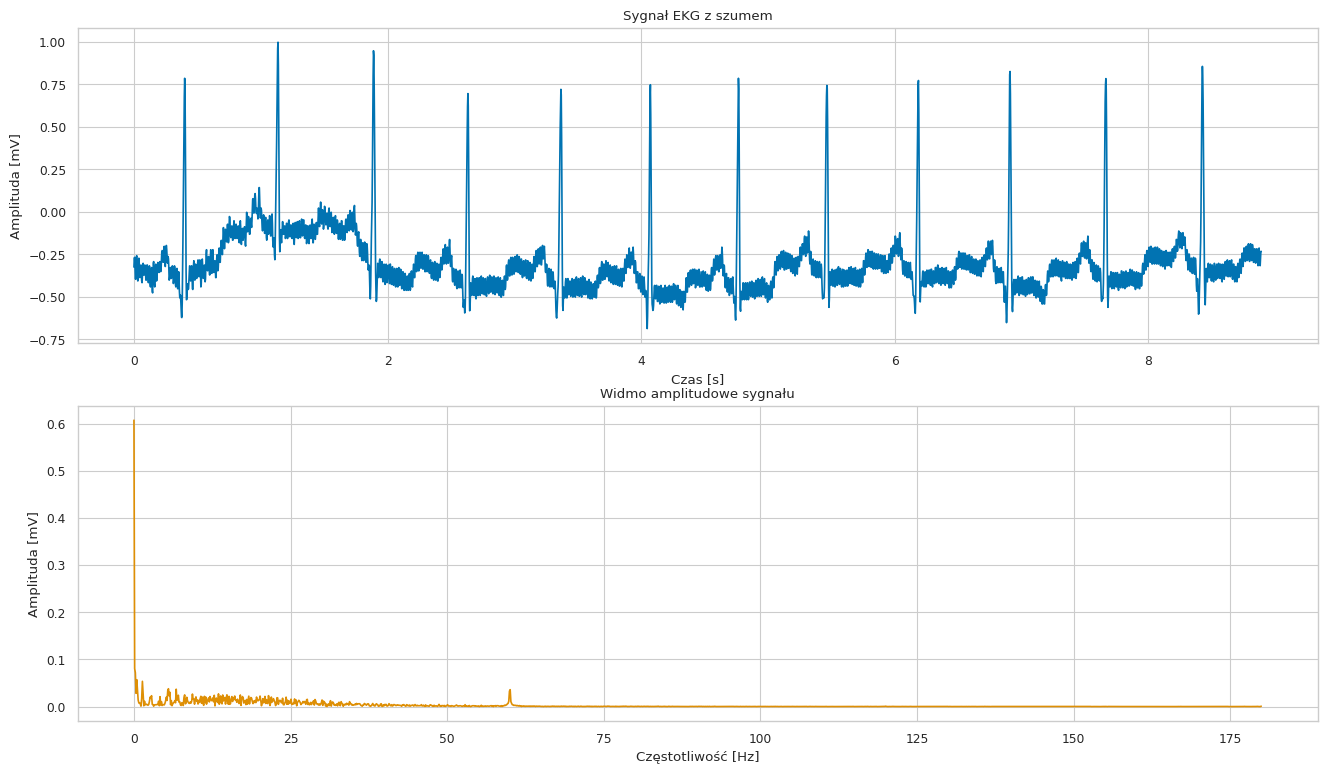

In [ ]:
fig = plt.figure(figsize=(16,9))
gs = plt.GridSpec(nrows=2, ncols=1)
fig.add_subplot(gs[0,0])
sns.lineplot(x=time, y=signal, legend=None, color='C0').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał EKG z szumem")
fig.add_subplot(gs[1,0])
sns.lineplot(x=freq_domain, y=np.abs(fsignal)/normalize, legend=None, color='C1').set(xlabel="Częstotliwość [Hz]", ylabel="Amplituda [mV]", title="Widmo amplitudowe sygnału")

<p> Opis wykresów:

1. **Sygnał EKG**
   - Ten wykres przedstawia oryginalny sygnał EKG w funkcji czasu.
   - Oś x reprezentuje czas w sekundach (s).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Przedstawia charakterystykę sygnału EKG, czyli zmiany napięcia elektrycznego w czasie, które są rejestrowane podczas badania.

2. **Widmo amplitudowe sygnału**
   - Ten wykres przedstawia widmo amplitudowe sygnału EKG po transformacji Fouriera.
   - Oś x reprezentuje częstotliwość w hercach (Hz).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Pokazuje, jakie częstotliwości składają się na sygnał EKG i jak mocne są te składowe w dziedzinie częstotliwości.</p>

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Widmo amplitudowe sygnału po filtracji dolnoprzepustowej')]

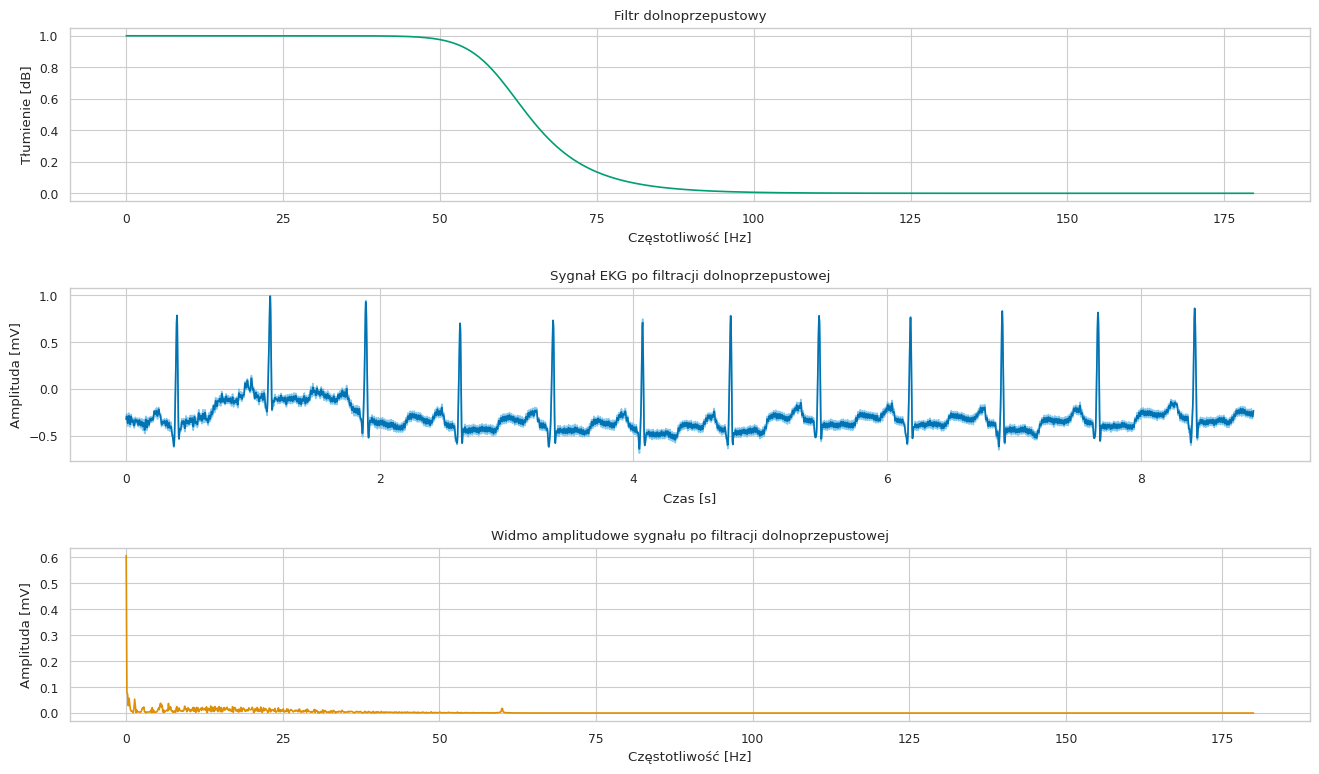

In [ ]:
sosl = sig.butter(N=order, Wn=highcut, btype='lowpass', analog=False, output='sos', fs=fs)
wl, hl = sig.sosfreqz(sos=sosl, fs=fs)
lsignal = sig.sosfiltfilt(sos=sosl, x=signal)
flsignal = fft.rfft(lsignal)

fig = plt.figure(figsize=(16,9))
gs = plt.GridSpec(nrows=3, ncols=1, hspace=0.5)
fig.add_subplot(gs[0,0])
sns.lineplot(x=wl, y=abs(hl), legend=None, color='C2').set(xlabel="Częstotliwość [Hz]", ylabel="Tłumienie [dB]", title="Filtr dolnoprzepustowy")
fig.add_subplot(gs[1,0])
sns.lineplot(x=time, y=signal, legend=None, color='C9', alpha=0.7)
sns.lineplot(x=time, y=lsignal, legend=None, color='C0').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał EKG po filtracji dolnoprzepustowej")
fig.add_subplot(gs[2,0])
sns.lineplot(x=freq_domain, y=np.abs(flsignal)/normalize, legend=None, color='C1').set(xlabel="Częstotliwość [Hz]", ylabel="Amplituda [mV]",
                                                                                           title="Widmo amplitudowe sygnału po filtracji dolnoprzepustowej")

<p>Opis wykresów:

1. **Filtr górnoprzepustowy**
   - Ten wykres przedstawia charakterystykę tłumienia filtru górnoprzepustowego.
   - Oś x reprezentuje częstotliwość odcięcia w hercach (Hz).
   - Oś y reprezentuje tłumienie w decybelach (dB).
   - Pokazuje, jak filtr górnoprzepustowy eliminuje składowe sygnału o niższych częstotliwościach, tłumiąc je poniżej określonej wartości.

2. **Sygnał EKG po filtracji dolnoprzepustowej**
   - Ten wykres przedstawia sygnał EKG po zastosowaniu filtracji dolnoprzepustowej.
   - Oś x reprezentuje czas w sekundach (s).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Pokazuje, jak filtr dolnoprzepustowy eliminuje składowe wysokoczęstotliwościowe z sygnału EKG, pozostawiając tylko składowe niskoczęstotliwościowe.

3. **Widmo amplitudowe sygnału po filtracji dolnoprzepustowej**
   - Ten wykres przedstawia widmo amplitudowe sygnału EKG po zastosowaniu filtracji dolnoprzepustowej.
   - Oś x reprezentuje częstotliwość w hercach (Hz).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Przedstawia, jak filtr dolnoprzepustowy zmienia widmo amplitudowe sygnału EKG, eliminując składowe wysokoczęstotliwościowe.</p>

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'Amplituda [mV]'),
 Text(0.5, 1.0, 'Widmo amplitudowe sygnału po filtracji górnoprzepustowej')]

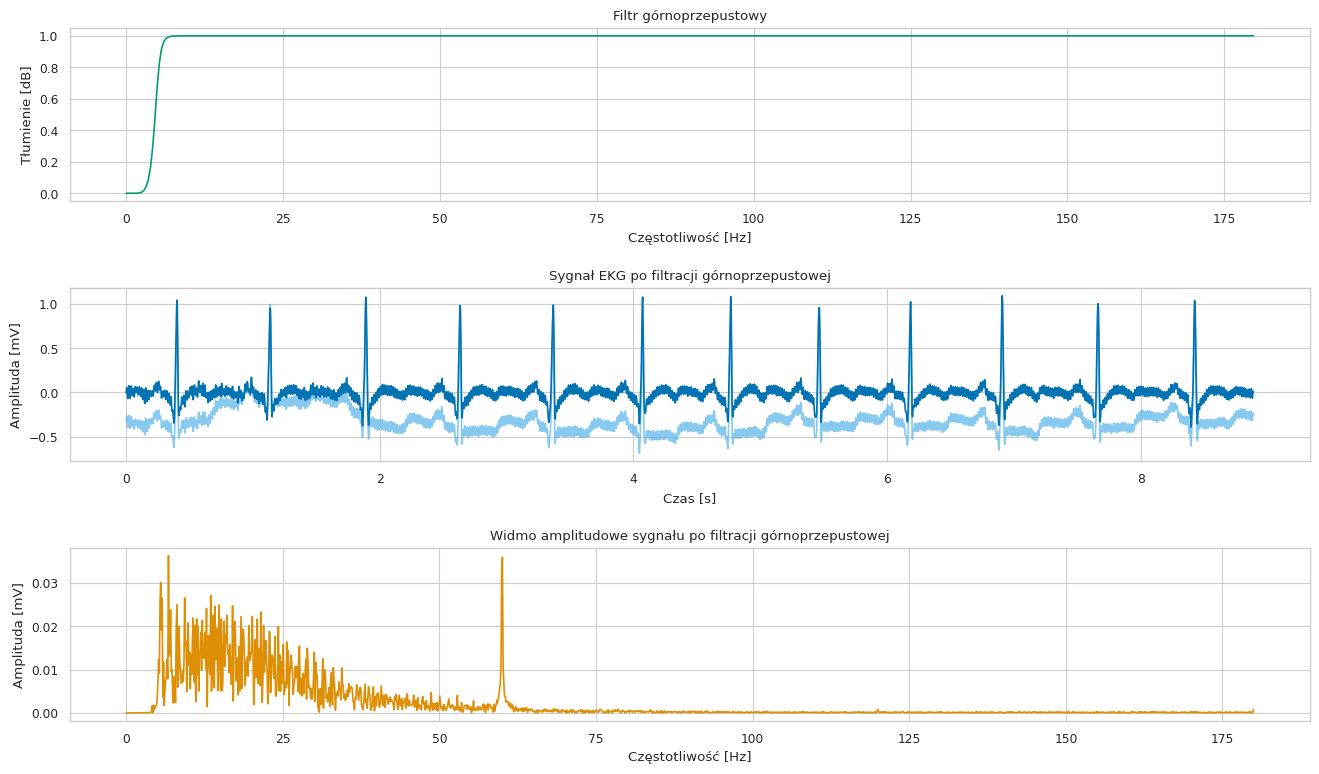

In [ ]:
sosh = sig.butter(N=order, Wn=lowcut, btype='highpass', analog=False, output='sos', fs=fs)
wh, hh = sig.sosfreqz(sos=sosh, fs=fs)
hsignal = sig.sosfiltfilt(sos=sosh, x=signal)
fhsignal = fft.rfft(hsignal)

fig = plt.figure(figsize=(16,9))
gs = plt.GridSpec(nrows=3, ncols=1, hspace=0.5)
fig.add_subplot(gs[0,0])
sns.lineplot(x=wh, y=abs(hh), legend=None, color='C2').set(xlabel="Częstotliwość [Hz]", ylabel="Tłumienie [dB]", title="Filtr górnoprzepustowy")
fig.add_subplot(gs[1,0])
sns.lineplot(x=time, y=signal, legend=None, color='C9', alpha=0.7)
sns.lineplot(x=time, y=hsignal, legend=None, color='C0').set(xlabel="Czas [s]", ylabel="Amplituda [mV]", title="Sygnał EKG po filtracji górnoprzepustowej")
fig.add_subplot(gs[2,0])
sns.lineplot(x=freq_domain, y=np.abs(fhsignal)/normalize, legend=None, color='C1').set(xlabel="Częstotliwość [Hz]", ylabel="Amplituda [mV]",
                                                                                           title="Widmo amplitudowe sygnału po filtracji górnoprzepustowej")

![zad4w1](../assets/Lab1/lab1zad4w1.png)

Przybliżona postać wykresów sygnału EKG po zastosowaniu filtrów górnoprzepustowych i dolnopustowych.

<p>Opis wykresów:

1. **Filtr górnoprzepustowy**
   - Ten wykres przedstawia charakterystykę tłumienia filtru górnoprzepustowego.
   - Oś x reprezentuje częstotliwość odcięcia w hercach (Hz).
   - Oś y reprezentuje tłumienie w decybelach (dB).
   - Pokazuje, jak filtr górnoprzepustowy eliminuje składowe sygnału o niższych częstotliwościach, tłumiąc je poniżej określonej wartości.

2. **Sygnał EKG po filtracji górnoprzepustowej**
   - Ten wykres przedstawia sygnał EKG po zastosowaniu filtracji górnoprzepustowej.
   - Oś x reprezentuje czas w sekundach (s).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Pokazuje, jak filtr górnoprzepustowy eliminuje składowe niskoczęstotliwościowe z sygnału EKG, pozostawiając tylko składowe wysokoczęstotliwościowe.

3. **Widmo amplitudowe sygnału po filtracji górnoprzepustowej**
   - Ten wykres przedstawia widmo amplitudowe sygnału EKG po zastosowaniu filtracji górnoprzepustowej.
   - Oś x reprezentuje częstotliwość w hercach (Hz).
   - Oś y reprezentuje amplitudę sygnału w miliwoltach (mV).
   - Przedstawia, jak filtr górnoprzepustowy zmienia widmo amplitudowe sygnału EKG, eliminując składowe niskoczęstotliwościowe.</p>